## Statistics Practical Implementation

### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [1]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [3]:
import numpy as np
print(np.average(ages))
print(np.mean(ages))
print(np.median(ages))

44.25
44.25
37.5


In [4]:
import statistics


print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [6]:
statistics.mode(ages)

32

<Axes: >

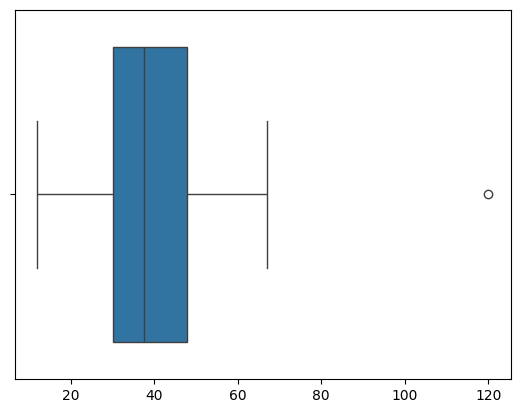

In [7]:
import seaborn as sns
sns.boxplot(ages, orient='h')

### 5 Number Summary

In [8]:
q1,q3=np.percentile(ages,[25,75])

In [9]:
print(q1, q3)

30.0 47.75


In [10]:
## to check outlier[Lower Fence- Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


### Measure Of Dispersion

1. Variance
2. Standard Deviation

In [16]:
print(statistics.variance(ages))

print(f"{statistics.variance(ages):.2f}")

795.2954545454545
795.30


In [17]:
# why, there is much difference of both variance, because np calculate 'population variance' while statistics cal 'sample variance'
np.var(ages, axis=0)

729.0208333333334

In [18]:
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance



In [22]:

#OR

def variance(data):
    mean = sum(data) / len(data)
    return sum((x - mean) ** 2 for x in data) / (len(data) - 1)

print(variance(ages))

795.2954545454545


In [21]:
variance(ages)

795.2954545454545

In [23]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [24]:

#OR

def variance(data, dof=0):
    mean = sum(data) / len(data)
    return sum((x - mean) ** 2 for x in data) / (len(data) - dof)

print(variance(ages, dof=1))

795.2954545454545


In [25]:
variance(ages,dof=1)

795.2954545454545

In [26]:
statistics.pvariance(ages)

729.0208333333334

In [28]:
# to calculate standard deviation
import math
math.sqrt(statistics.pvariance(ages))



27.000385799712813

In [30]:

sd= statistics.stdev(ages) # this is for 'sample sd'
sd1= statistics.pstdev(ages) # this is for 'population sd'

print(sd)
print(sd1)

28.2009832194811
27.000385799712813


## Histograms And PDF

<Axes: ylabel='Count'>

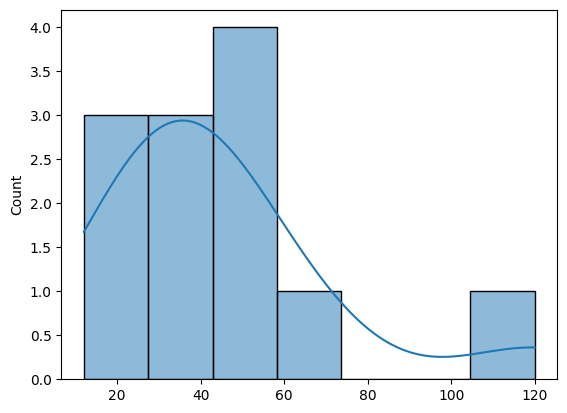

In [24]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [25]:
df=sns.load_dataset('iris')

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

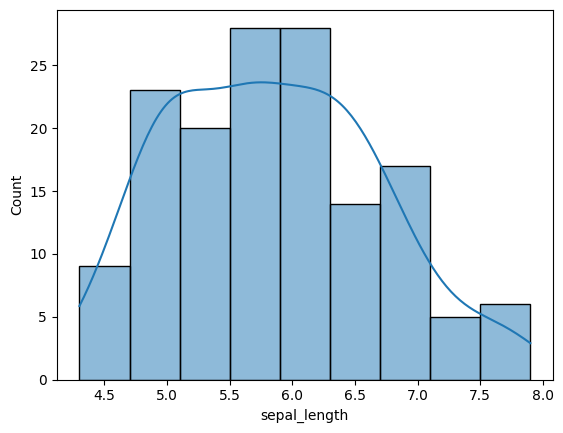

In [27]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

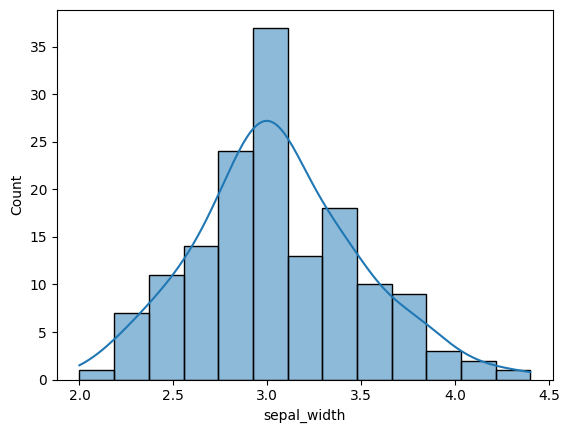

In [28]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

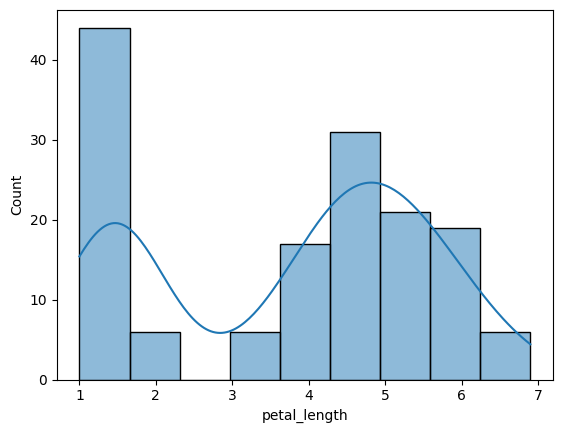

In [29]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

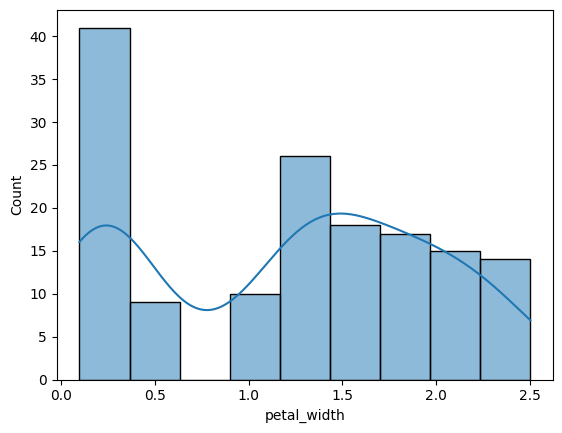

In [30]:
sns.histplot(df['petal_width'],kde=True)

In [38]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,500)  # 0.5 is mean & 0.2 is std. dev of 500 data

In [39]:
s

array([ 0.66282724,  0.60918355,  0.69154765,  0.86745135,  0.3839701 ,
        0.51012702,  0.62642985,  0.72462545,  0.62255809,  0.36797236,
        0.21208835,  0.51557203,  0.29195951,  0.53126939,  0.45175838,
       -0.12155543,  0.50373672,  0.57133766,  0.55897898,  0.04139923,
        0.10687415,  0.71129972,  0.79107349,  0.64834155,  0.58782144,
        0.56937151,  0.56072141,  0.40632156,  0.5330383 ,  0.56865371,
        0.40773012,  0.35329693,  0.41260963,  1.17262272,  0.37920103,
        1.04236795,  0.28527937,  0.41418   ,  0.58845646,  0.27249116,
        0.72294423,  0.09461301,  0.24692331,  0.40356136,  0.42074232,
        0.37771289,  0.59873786,  0.53262337,  0.6002944 ,  0.89500025,
        0.57287221,  0.50339365,  0.57611178,  0.27313493,  0.55682102,
        0.32816609,  0.15029267,  0.68392379,  0.27323674,  0.64616874,
        0.72551672,  0.62243573,  0.7795852 ,  0.49827142,  0.53496724,
        0.71375419,  0.59361553,  0.19426341,  0.56239829,  0.48

<Axes: ylabel='Count'>

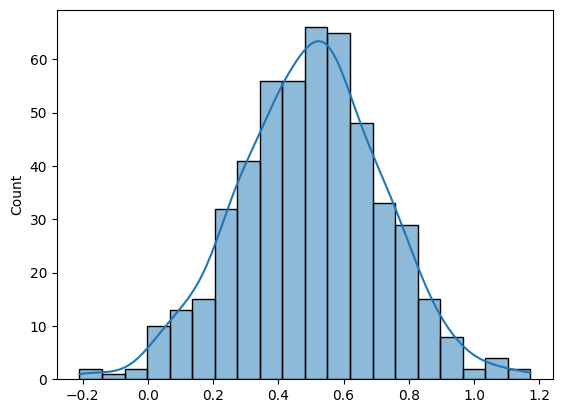

In [40]:
sns.histplot(s,kde=True)

## Other Distribuiton

### 1. Log Normal Distribution


### 2. Power Law Distribution

In [41]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

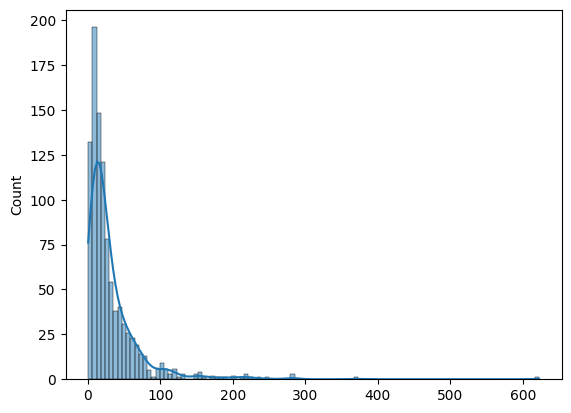

In [42]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

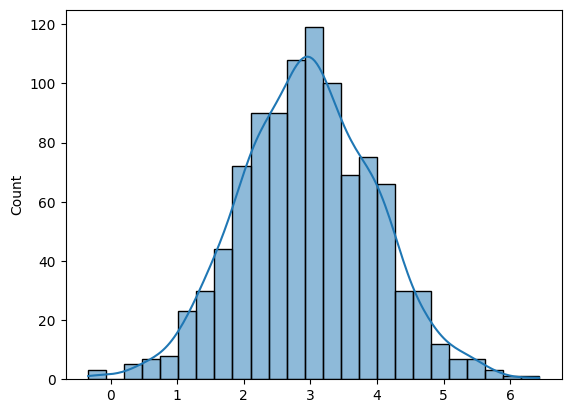

In [43]:
sns.histplot(np.log(s),kde=True)

### Check whether Disstribution is Normal Distribution

In [44]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

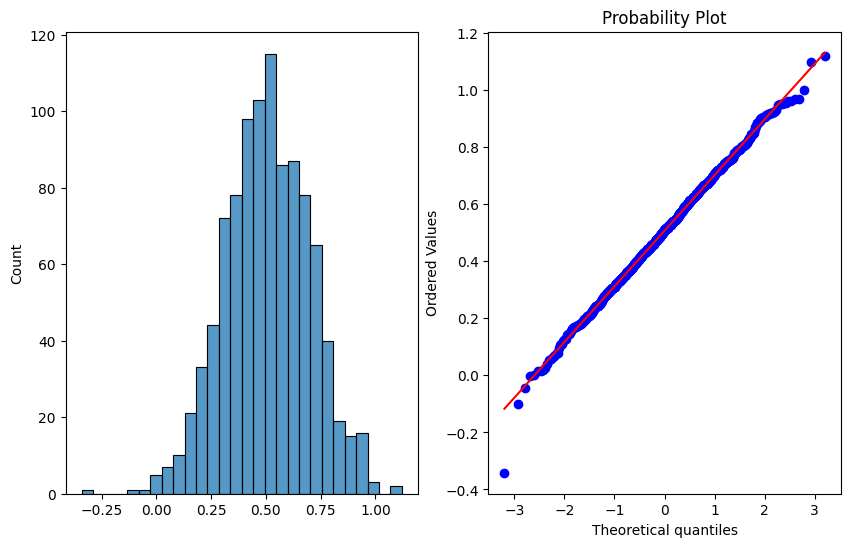

In [45]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

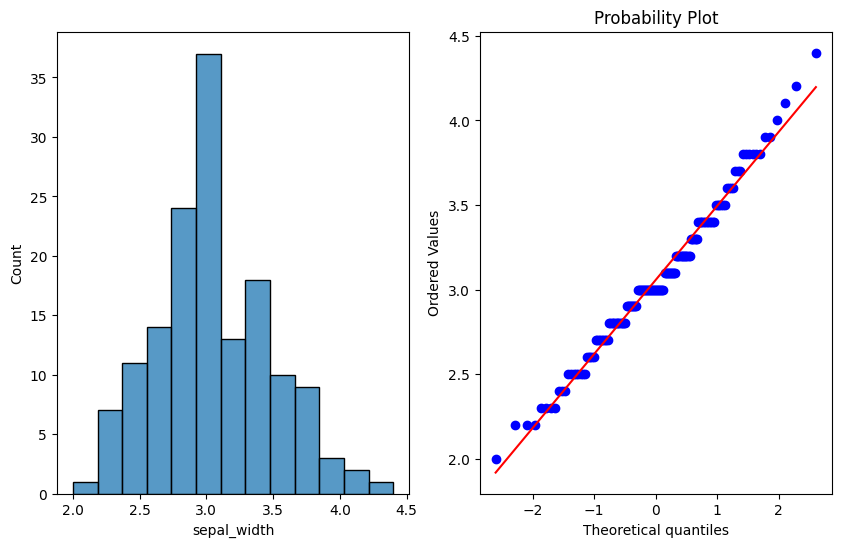

In [46]:
plot_data(df['sepal_width'])

In [47]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [48]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

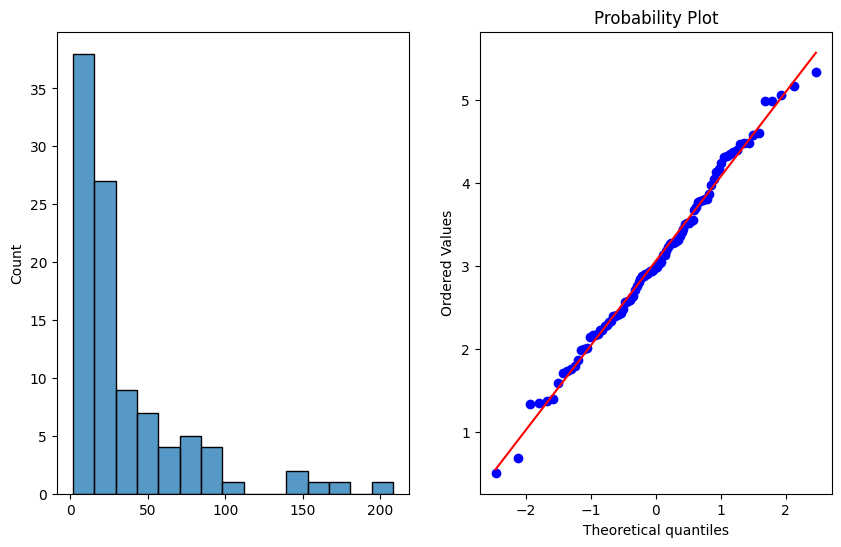

In [49]:
plot_data_log(sample)

### Pearson and Sperman Rank Correlation

In [50]:
df=sns.load_dataset('tips')

In [51]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
import pandas as pd

In [70]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


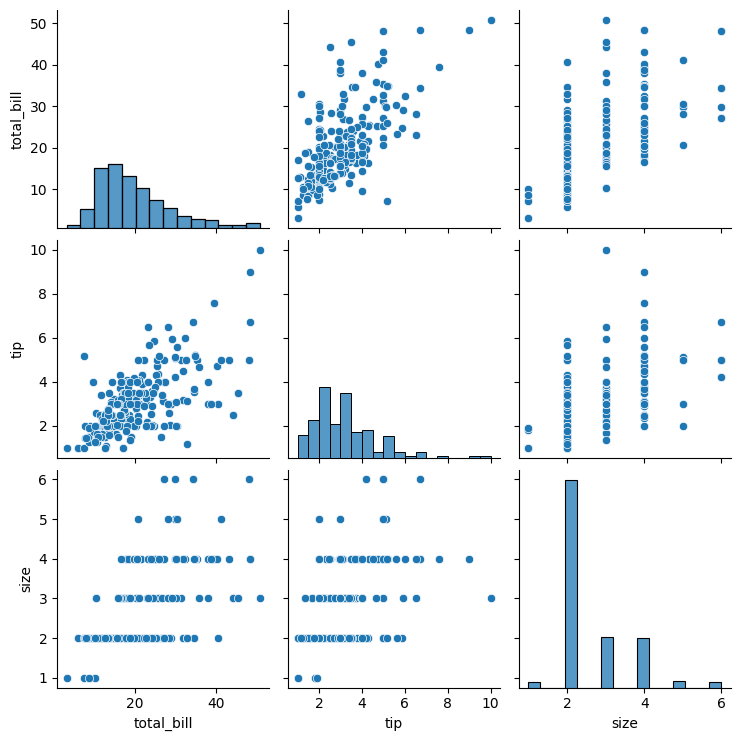

In [71]:
sns.pairplot(df)